In [77]:
from sklearn import datasets
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.85, random_state=57) # 85% data is test, 15% is train

In [78]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(neighbors.KNeighborsClassifier(5))

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score

print (accuracy_score(pred,y_test))

0.953125


Class 0
FPR = [ 0.  1.]
TPR = Sensitivity = [ 1.  1.]
TNR = Specificity = [ 1.  0.]

Class 1
FPR = [ 0.          0.01136364  1.        ]
TPR = Sensitivity = [ 0.     0.875  1.   ]
TNR = Specificity = [ 1.          0.98863636  0.        ]

Class 2
FPR = [ 0.          0.05747126  1.        ]
TPR = Sensitivity = [ 0.          0.97560976  1.        ]
TNR = Specificity = [ 1.          0.94252874  0.        ]



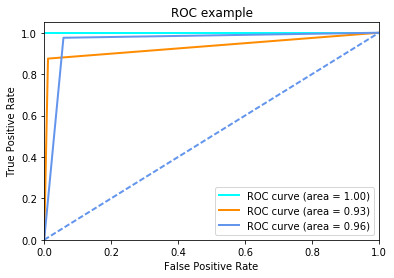

In [80]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'navy'])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print ('Class ' + str(i))
    print ('FPR = ' + str(fpr[i]))
    print ('TPR = Sensitivity = ' + str(tpr[i]))
    print ('TNR = Specificity = ' + str(1-fpr[i]))
    print ('')
    
plt.figure()
lw = 2
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color=color, lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC example')
plt.legend(loc="lower right")
plt.show()

In [81]:
# Compute Precision-Recall and plot curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# We will calculate precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], #y_test, y_score are 75 x 3
                                                        pred[:, i])
    # Third value in above statement is threshold
    average_precision[i] = average_precision_score(y_test[:, i], pred[:, i])

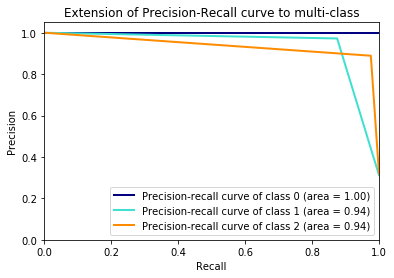

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# Plot Precision-Recall curve for each class

# Clear the plot
plt.clf()
lw = 2 #line width

colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

for i, color in zip(range(n_classes), colors):
    # Plot for each class using the color specified earlier
    plt.plot(recall[i], precision[i], color=color, lw=lw,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0]) # Specifies the coordinates limits for x-axis
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()